#Principal Component Analysis(PCA)

##Step 1: Import libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [6]:
path ='/content/sat_image_plaksha.jpg'

## Step 2: Load the given image and read it using OpenCV. Visualise the image.

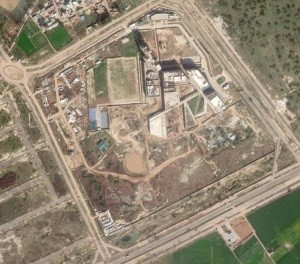

In [7]:
from google.colab.patches import cv2_imshow
img=cv2.imread(path)
cv2_imshow(img)

## Step 3: Convert the image to grayscale. Visualise it.

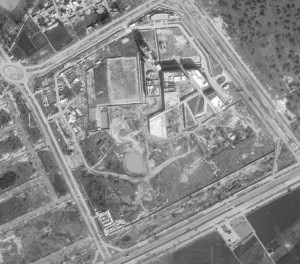

In [8]:
imgray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(imgray)

## Step 4: Convert the image to double(np.float64) for performing the mathematical operations accurately.

In [9]:
imgray=imgray.astype(np.float64)

In [10]:
imgmat=np.array(imgray)                                        #image to ndarray
imgmat

array([[162., 169., 167., ..., 109., 112., 110.],
       [168., 169., 164., ..., 106., 107., 104.],
       [160., 176., 171., ..., 109., 113., 113.],
       ...,
       [191., 196., 159., ...,  74.,  73.,  70.],
       [136., 147., 130., ...,  74.,  72.,  72.],
       [136., 140., 133., ...,  71.,  67.,  67.]])

## Step 5: Compute the mean of each column (name it mean_column) and subtract it from the image (call the subtracted image image_mean_subtracted)

In [11]:
mean_column=np.mean(imgmat,axis=0)

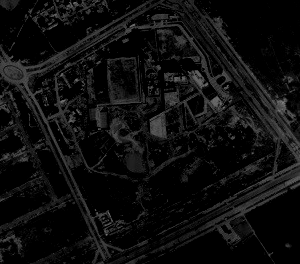

In [12]:
#subtracting mean from the image
image_mean_subtracted=imgmat-mean_column
cv2_imshow(image_mean_subtracted)

## Step 6: Compute the covariance matrix using numpy on image_mean_subtracted

In [13]:
cov_img=np.cov(image_mean_subtracted,rowvar=False)

## Step 7:Get eigenvalues and eigenvectors using numpy

In [14]:
eigval,eigvec=np.linalg.eigh(cov_img)
eigval,eigvec

(array([-1.82761257e-12, -1.67241524e-12, -1.36229541e-12, -1.12000832e-12,
        -1.10814475e-12, -1.03314271e-12, -9.11383350e-13, -7.57322324e-13,
        -7.51082716e-13, -5.64847508e-13, -4.67422774e-13, -4.37800371e-13,
        -3.82107166e-13, -3.39252561e-13, -2.44888059e-13, -1.40246864e-13,
        -8.41259978e-14, -4.53514374e-14, -1.27464578e-14,  2.05811169e-13,
         2.54472016e-13,  2.93281301e-13,  3.07308247e-13,  3.85906623e-13,
         3.96559869e-13,  5.01623980e-13,  5.66464966e-13,  7.14361896e-13,
         7.61455810e-13,  8.89355437e-13,  9.25769714e-13,  1.00588248e-12,
         1.08537341e-12,  1.45492517e-12,  1.49551551e-12,  2.61748829e-12,
         3.57437666e-12,  6.93916349e-01,  1.06144038e+00,  1.32232400e+00,
         1.44472801e+00,  1.62989557e+00,  1.97092937e+00,  2.37145199e+00,
         2.58443868e+00,  3.41497312e+00,  3.51625520e+00,  3.76186159e+00,
         4.01589270e+00,  4.24771122e+00,  4.42864293e+00,  4.80824998e+00,
         5.4

## Step 8:Sort eigenvectors by eigenvalues

In [15]:
eigindex=np.argsort(eigval)[::-1]
eigval=eigval[eigindex]
eigvec=eigvec[:,eigindex]


In [16]:
eigval,eigvec

(array([ 5.63294113e+04,  3.66340016e+04,  2.93994813e+04,  2.28486224e+04,
         1.73508832e+04,  1.60313480e+04,  1.31732244e+04,  1.05589938e+04,
         9.19039668e+03,  8.71147108e+03,  6.74188435e+03,  6.67937330e+03,
         5.34706126e+03,  4.76454528e+03,  4.48727389e+03,  4.21526060e+03,
         4.05755706e+03,  3.82091642e+03,  3.74956705e+03,  3.48369051e+03,
         3.25224107e+03,  2.93166564e+03,  2.85275602e+03,  2.71829324e+03,
         2.60976635e+03,  2.47550280e+03,  2.37702804e+03,  2.36803629e+03,
         2.20536627e+03,  2.10394938e+03,  2.00475654e+03,  1.92347537e+03,
         1.85443490e+03,  1.75281073e+03,  1.70391195e+03,  1.67439301e+03,
         1.51795940e+03,  1.49528251e+03,  1.48290977e+03,  1.39006328e+03,
         1.35638712e+03,  1.28692401e+03,  1.24314065e+03,  1.21186872e+03,
         1.19895832e+03,  1.15329603e+03,  1.12046714e+03,  1.09067300e+03,
         1.08200895e+03,  1.02479205e+03,  9.81849313e+02,  9.47135772e+02,
         9.3

In [17]:
eigvec.shape

(300, 300)

## Step 9: Define the number of principal components to keep.

In [18]:
ncomp=[10,20,30,40,50,60,90,300]                                #number of principal components

## Step 10:For each num_components, compress the image and then reconstruct it. Store all reconstructed images in Output_images variable

In [19]:
#compressing and reconstructing
output_images=[]
for i in ncomp:
  feature_vec=eigvec[:,:i]
  comp_img=np.dot(image_mean_subtracted,feature_vec)
  recons_img=np.dot(comp_img,feature_vec.T)+mean_column
  output_images.append(recons_img)





In [20]:
var_exp=eigval/np.sum(eigval)
var_exp                                     #Variance Explained

array([ 1.54217897e-01,  1.00296072e-01,  8.04895005e-02,  6.25546479e-02,
        4.75030123e-02,  4.38904069e-02,  3.60654748e-02,  2.89082698e-02,
        2.51613432e-02,  2.38501472e-02,  1.84578394e-02,  1.82866975e-02,
        1.46391117e-02,  1.30443073e-02,  1.22851975e-02,  1.15404832e-02,
        1.11087246e-02,  1.04608531e-02,  1.02655137e-02,  9.53760056e-03,
        8.90394142e-03,  8.02627437e-03,  7.81023667e-03,  7.44210632e-03,
        7.14498286e-03,  6.77739794e-03,  6.50779508e-03,  6.48317758e-03,
        6.03782182e-03,  5.76016404e-03,  5.48859523e-03,  5.26606473e-03,
        5.07704668e-03,  4.79882141e-03,  4.66494699e-03,  4.58413043e-03,
        4.15584864e-03,  4.09376415e-03,  4.05989022e-03,  3.80569638e-03,
        3.71349822e-03,  3.52332308e-03,  3.40345358e-03,  3.31783772e-03,
        3.28249181e-03,  3.15747822e-03,  3.06759973e-03,  2.98602973e-03,
        2.96230941e-03,  2.80566176e-03,  2.68809371e-03,  2.59305545e-03,
        2.55592284e-03,  

##Step 11:For each image in Output_images, display number of components and the explained variance above each plot.

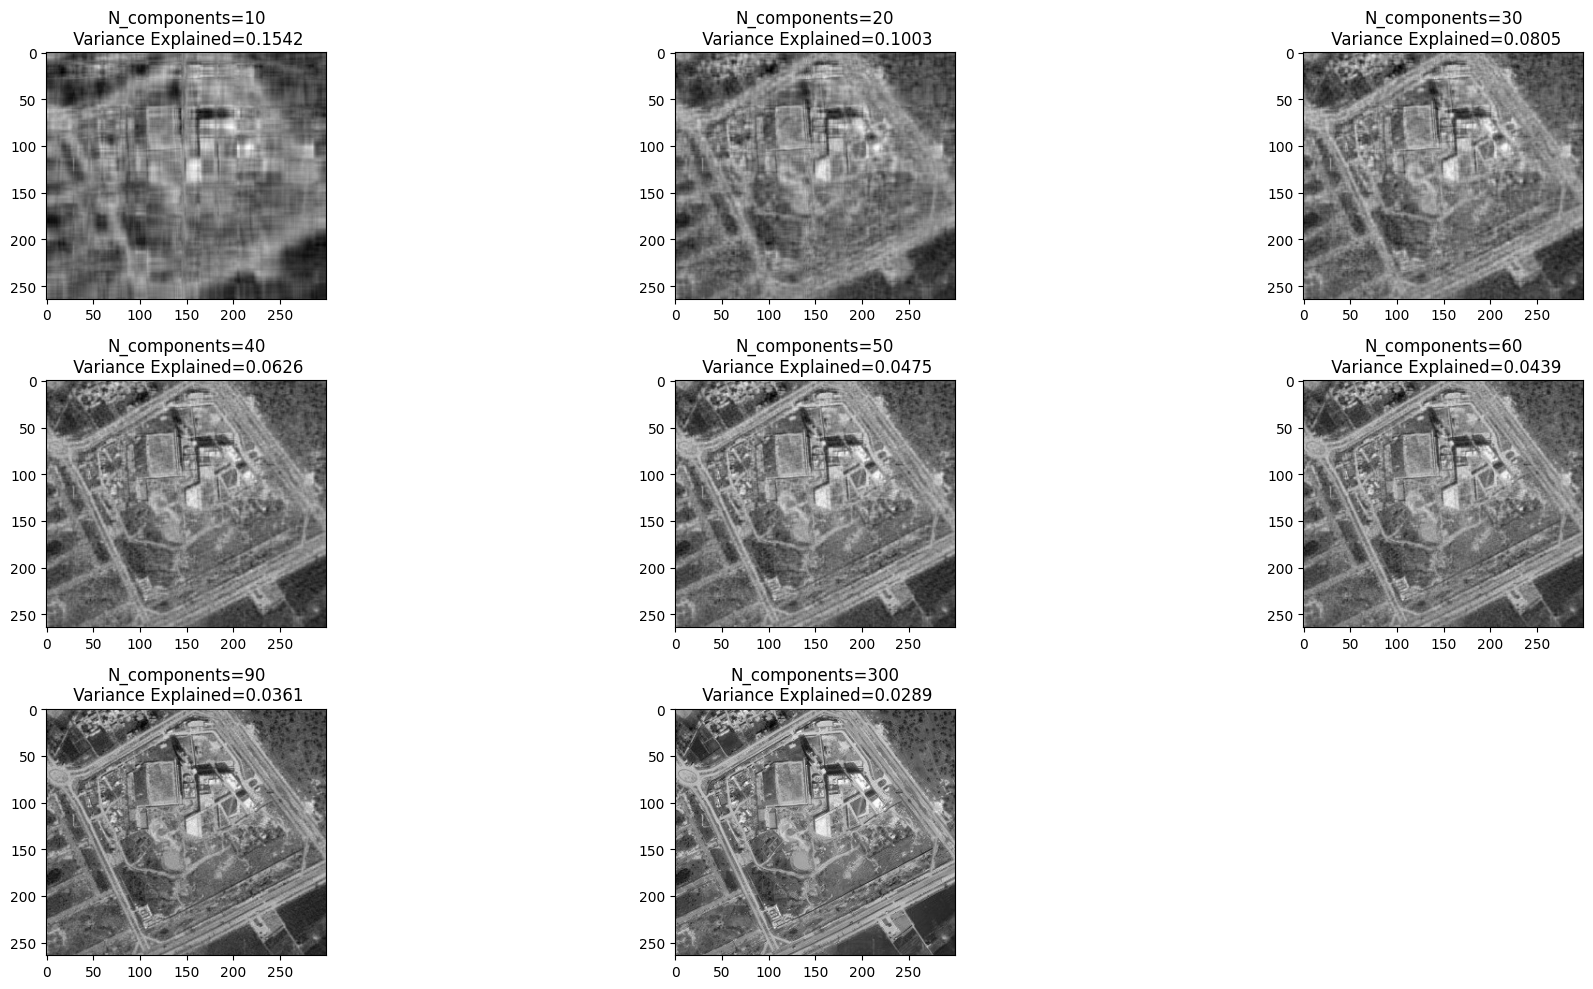

In [21]:
plt.figure(figsize=(20,10))
for i in range(len(output_images)):
  plt.subplot(3,3,i+1)
  plt.imshow(output_images[i],cmap='gray')
  plt.title(f'N_components={ncomp[i]}\n Variance Explained={round(np.sum(var_exp[i]),ndigits=4)}')


plt.tight_layout()



Most of the image is recreated by considering about 90 principal components.

##Compute minimum num_components needed to explain 95% variance in data

In [22]:
thres=0.95
n=1
while sum(var_exp[:n])<=thres:
  n+=1

print('Minimum N_components=',n)

Minimum N_components= 91


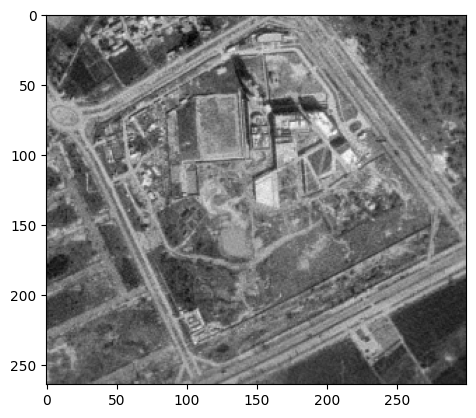

In [23]:
#plotting image for minimum N_components=91
f_vec=eigvec[:,:91]
c_img=np.dot(image_mean_subtracted,f_vec)
re_img=np.dot(c_img,f_vec.T)+mean_column
plt.imshow(re_img,cmap='gray')

## Use PCA function from sklearn to compute num_components (for 95% data variance)

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=91)                                                            #PCA with sklearn and 91 principal components
pca.fit(imgmat)

PCA(n_components=91)

In [25]:
exp_var=pca.explained_variance_ratio_.cumsum()
exp_var[-1]

0.9505785631863112

The Explained Variance is 95% with Scikit learn is synchronous to Numpy.